In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [59]:
import nptdms
from nptdms import TdmsFile
#savepath = 'U:/PIV_HSC_11_12_2019/Signal_70_Umin'
savepath = 'L:/022_PIV_OVP'
path = "U:/PIV_HSC_11_12_2019/Signal_200_Umin"

In [60]:
def writetdms(tdms, num):
    groups = tdms.groups()
    channels = tdms.group_channels(groups[0])
    channel_names = [channel.channel for channel in channels]
    obj = tdms.object(groups[0], channel_names[num])
    data = np.asarray(obj.data)
    

    return data



def datetime_to_float(timesignal):

    t0 = timesignal[0]
    t1 = timesignal[timesignal.shape[0] - 1]
    sec = (t1-t0).total_seconds()
    time = np.linspace(0, sec, timesignal.shape[0])

    return time

In [61]:
size = 128000
tpAr = np.empty(size)
pAr = np.empty(size)
area = np.pi * 0.056**2.0 / 4.0

In [62]:
ch = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
tdms = TdmsFile(path+'/Messungen_' +str(9)+".tdms")
tp1 = datetime_to_float(writetdms(tdms, ch[0]))
p1 = writetdms(tdms, ch[1])
tp2 = datetime_to_float(writetdms(tdms, ch[2]))
p2 = writetdms(tdms, ch[3])
tp3 = datetime_to_float(writetdms(tdms, ch[4]))
p3 = writetdms(tdms, ch[5])
tp4 = datetime_to_float(writetdms(tdms, ch[6]))
p4 = writetdms(tdms, ch[7])
tpV = datetime_to_float(writetdms(tdms, ch[8]))
pV = writetdms(tdms, ch[9])
tpAr = datetime_to_float(writetdms(tdms, ch[10]))
pAr = writetdms(tdms, ch[11])
t_hub = datetime_to_float(writetdms(tdms, ch[12]))
hub = writetdms(tdms, ch[13])
tpd2 = datetime_to_float(writetdms(tdms, ch[14]))
pd2 = writetdms(tdms, ch[15])
tpd1 = datetime_to_float(writetdms(tdms, ch[16]))
pd1 = writetdms(tdms, ch[17])
tpd5 = datetime_to_float(writetdms(tdms, ch[18]))
pd5 = writetdms(tdms, ch[19])
tpd7 = datetime_to_float(writetdms(tdms, ch[20]))
pd7 = writetdms(tdms, ch[21])
tbsv = datetime_to_float(writetdms(tdms, ch[22]))
bsv = writetdms(tdms, ch[23])
tbsr = datetime_to_float(writetdms(tdms, ch[24]))
bsr = writetdms(tdms, ch[25])

In [63]:
from scipy import signal

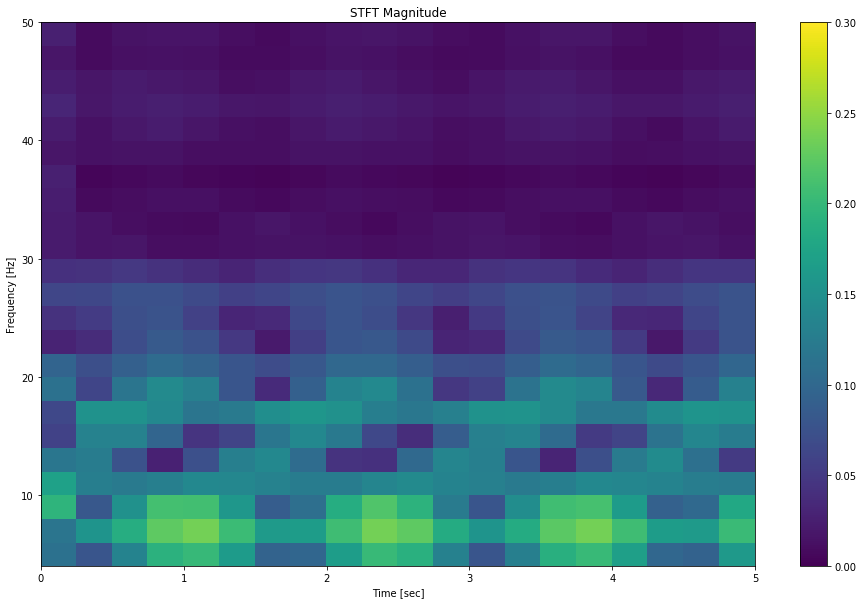

In [64]:
fs = 25600
N = 128000
f, t, Zxx = signal.stft(p3, fs, nperseg = 5*2560)
plt.figure(figsize=(16,10))
plt.pcolormesh(t, f, np.abs(Zxx),vmin=0, vmax=0.3)
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(4, 50)
plt.xlim(0,5)
plt.savefig(savepath+'/STFT_156_Umin.png', dpi=800)
plt.show()

(0, 4)

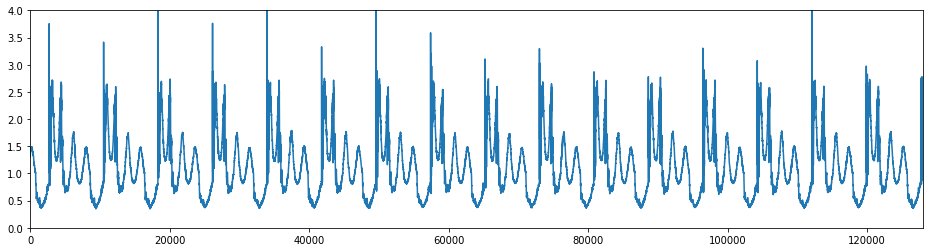

In [66]:
plt.figure(figsize=(16,4))
plt.plot(p3)
plt.xlim(0, 128000)
plt.ylim(0, 4)

In [9]:
from scipy import signal
def perform_cwt(sig, width_factor):
    sig  = sig[0:-50] - np.average(sig)
    #timesignal = timesignal[0:-50]
    widths = np.arange(1, width_factor)
    cwtmatr = signal.cwt(sig, signal.morlet, widths)
    plt.figure(figsize=(20,10))
    plt.imshow(cwtmatr, cmap='viridis', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.show()
    plt.close()
    plt.figure(figsize=(20,10))
    plt.plot(sig-np.average(sig))
    plt.xlim(0, sig.shape[0])
    plt.show()

C:\Users\fe\AppData\Local\conda\conda\envs\CavSim\lib\site-packages\scipy\signal\wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')


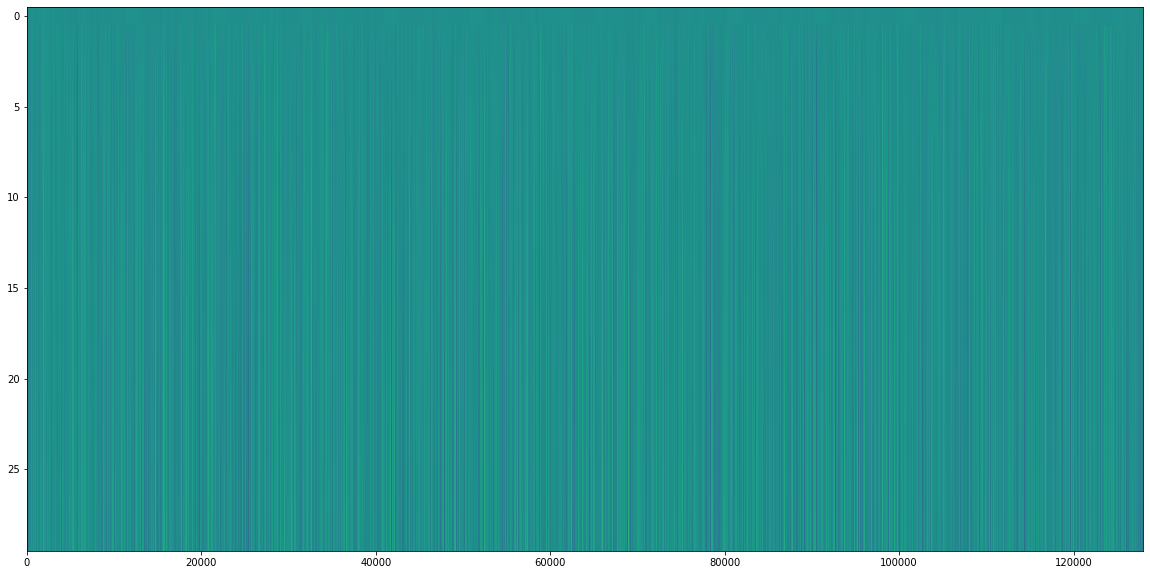

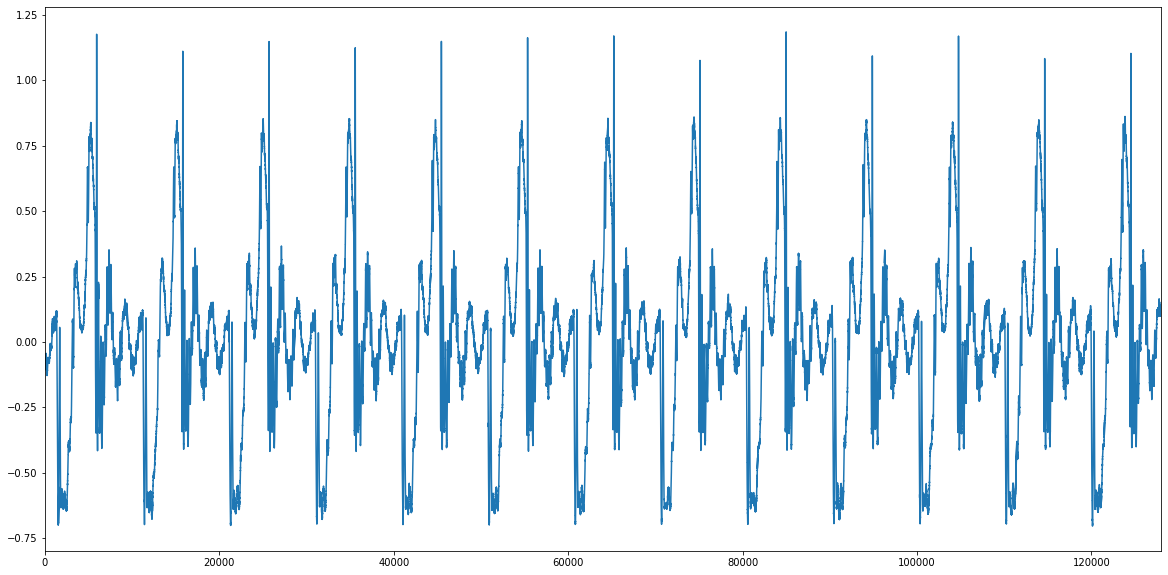

In [10]:
perform_cwt(p1, 31)

In [67]:
def pywt_wavelet_freq(signal, time, num_steps):
    delta_t = time[1] - time[0]
    scales = np.arange(1,num_steps+1)
    wavelet_type = 'morl'
    sampling_period = len(signal)/25600
    coefs, freqs = pywt.cwt(signal-np.average(signal), scales, wavelet_type, delta_t)
    freqs = pywt.scale2frequency('morl', scale)/sampling_period
    fig, ax = plt.subplots(figsize=(16, 12), nrows=2)
    c = ax[0].pcolormesh(time, freqs, coefs , cmap='viridis')
    ax[0].axis([time.min(), time.max(), freqs.min(), freqs.max()])
    plt.colorbar(c, ax=ax[0], orientation='horizontal')
    ax[0].set_label('Amplitude [-]')
    ax[0].set_ylim([freqs.min(), 300])
    #ax[0].set_yscale('log')
    ax[0].set_ylabel('Frequenz [Hz]', fontsize = 14)
    ax[0].set_xlabel('Zeit [s]', fontsize = 14)
    ax[0].tick_params(labelsize = 10)
    ax[0].set_title("Spektrogramm", fontsize =16)
    ax[1].plot(time, signal-np.average(signal))
    ax[1].set_xlim(time.min(), time.max())
    ax[1].set_xlabel('Zeit [s]', fontsize = 14)
    ax[1].set_ylabel('Druck', fontsize = 14)
    ax[1].set_title("Zeitsignal", fontsize =16)
    fig.suptitle("Analyse mithilfe der Wavelet Transformation", fontsize =18)
#    plt.savefig(savepath+'Wavelet_transformation{}'.format(i))
    plt.show()
    plt.close()

In [68]:
pywt_wavelet_freq(p1[0:25600], tp1[0:25600], 2560)

NameError: name 'scale' is not defined